# Supervised learning paradigm

In this tutorial we will be looking at a method in supervised learning paradigm called neural networks. What does supervised learning mean? I suggest you to find this out [here](https://en.wikipedia.org/wiki/Supervised_learning). _TLDR?_ In Supervised Learning we **train** a **model** (typically using some kind of a machine learning algorithm) on a **labeled dataset** to predict labels on a new previously unseen data.

## Loss function
First of all we need to measure how good our model's predictions are. For this sake let's define a loss function which will take a model prediction (possibly incorrect), a true prediction from labeled dataset (people also frequently call it the train dataset). One of the popular ones is Mean Squared Error, which is defined as
$$MSE(y, \hat{y}) = \frac12 (y - \hat{y})^2$$

Where $y$ is a vector that contains true values that we need to predict or generalize on (for example, from the test set) and $\hat{y}$ is a vector that contains model predictions. 

In [286]:
import numpy as np

def mse(target_y, model_y):
    return 0.5 * np.square(target_y - model_y)

Now let us plot two linear functions
$$ y = y_{true}(x) = 2 * x + 3$$ 
$$\hat{y} = y_{model}(x) = 3 * x + 3$$ 

and their elementwise $MSE(y, \hat{y})$

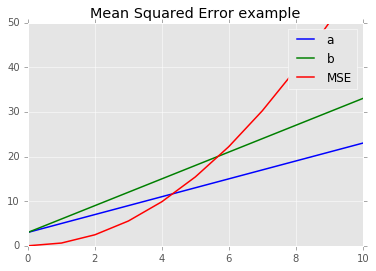

In [520]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 10, 10)
y_true = np.multiply(x, 2) + 3
y_model = np.multiply(x, 3) + 3
mse_error = mse(y_true, y_model)

plt.style.use('ggplot')
plt.title("Mean Squared Error example")
yt_plot, = plt.plot(x, y_true, linewidth=1.5, color='blue', label='y_true')
ym_plot, = plt.plot(x, y_model, linewidth=1.5, color='green', label='y_model')
mse_plot, = plt.plot(mse_error, linewidth=1.5, color='red', label='MSE')
plt.legend([yt_plot, ym_plot, mse_plot], ['a', 'b', 'MSE'])

As we see the more our funtions are different the larger their MSE gets.

## Multi Layer Perceptron
Multi Layer Perceptron is a conventional neural network architecture we will be looking at during this tutorial. Here I will give the basics but I strongly suggest that you read more comprehensive material like those [excellent tutorials here](neuralnetworksanddeeplearning.com/chap1.html) and [here](neuralnetworksanddeeplearning.com/chap2.html). 

### Neurons
Each neural network model consists of several collections of units called neurons (this concept is loosely based on the structure of our brain). In its most simple form (there are more advanced ones like LSTM which we will not cover here) each unit accepts a single real-valued input $x \in \mathbb{R}$ and evaluates on it a special function called activation function.

#### Activation function
Now lets construct our activation function. For this example we will use so called Rectified Linear Unit or ReLU which is defined as 
$$ReLU(x) = max(x, 0)$$

This kind of activation function turns out to be useful for its properties:
1. It is partially differentiable and differentiability is of paramount importance for neural networks as you will see
1. It's derivative does not saturate anywhere. Actually, it is just a constant anywhere ReLU is geather that 1. That helps to avoid a common problem in neural networks called gradient vanishing problem

$$ \frac{dReLU(x)}{dx} = I(x>0) $$
where $I$ is an [indicator function](https://en.wikipedia.org/wiki/Indicator_function).

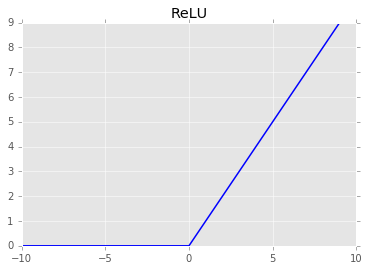

In [288]:
def relu(val):
    return np.maximum(val, 0)

x = np.arange(-10, 10)
y = relu(x)

plt.style.use('ggplot')
plt.title("ReLU")
plt.plot(x, y, linewidth=1.5, color='blue')

### Layers
Each neural network consists of groups of neurons called layers. Layers are connected between each other with weights.

Multi Layer Perceptron consists of an input layer $I$, any number of hidden layers $H_i$ and an output layer $O$. All variables I mentioned up there are matrices and their size is depicted below each matrix name. Hidden layers also are attached to a special function $f$ called activation function.

The forward pass to the network goes like this:
$$f_o(f_h(I \times H) \times O)$$
where $f_h$ is a hidden layer activation function applied to each neuron inside and $f_o$ is an output layer activation functioon.

### Backpropogation and stochastic gradient descent (SGD)
For now for the explanation of those concepts I will refer to the tutorial links I've left before.

## MLP Implementation
Below goes simplistic implementation of Multi Layer Perceptron which is trained using SGD.

[[  1   2]
 [  3   4]
 [  5   6]
 [  7   8]
 [  9  10]
 [ 11  12]
 [ 13  14]
 [ 15  16]
 [ 17  18]
 [ 19  20]
 [ 21  22]
 [ 23  24]
 [ 25  26]
 [ 27  28]
 [ 29  30]
 [ 31  32]
 [ 33  34]
 [ 35  36]
 [ 37  38]
 [ 39  40]
 [ 41  42]
 [ 43  44]
 [ 45  46]
 [ 47  48]
 [ 49  50]
 [ 51  52]
 [ 53  54]
 [ 55  56]
 [ 57  58]
 [ 59  60]
 [ 61  62]
 [ 63  64]
 [ 65  66]
 [ 67  68]
 [ 69  70]
 [ 71  72]
 [ 73  74]
 [ 75  76]
 [ 77  78]
 [ 79  80]
 [ 81  82]
 [ 83  84]
 [ 85  86]
 [ 87  88]
 [ 89  90]
 [ 91  92]
 [ 93  94]
 [ 95  96]
 [ 97  98]
 [ 99 100]]
[[-0.02116747]
 [ 0.5330343 ]
 [ 1.00442367]
 [ 0.39888346]
 [-0.02040472]
 [ 0.7365517 ]
 [ 1.04541355]
 [ 0.13780551]
 [ 0.20741879]
 [ 0.93780908]
 [ 0.70351133]
 [-0.00249494]
 [ 0.46394943]
 [ 0.98345534]
 [ 0.42731812]
 [ 0.00975616]
 [ 0.66355492]
 [ 0.9617698 ]
 [ 0.18474016]
 [ 0.16200475]
 [ 0.95006402]
 [ 0.73679223]
 [ 0.02572038]
 [ 0.44562919]
 [ 0.99991868]
 [ 0.35509903]
 [ 0.04720004]
 [ 0.7442825 ]
 [ 0.84450407]
 [ 0.08299746]

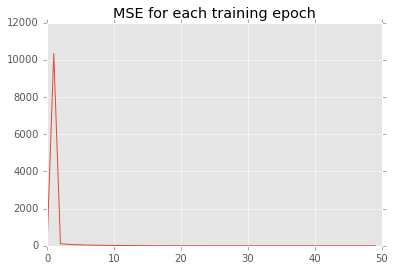

In [527]:
import random

def relu(val):
    return np.maximum(val, 0)


def relu_der(val):
    return (val > 0).astype(float)


def mse(target_y, model_y):
    return 0.5 * np.square(target_y - model_y)

def mse_der(target_y, model_y):
    return target_y - model_y


def delta(output, weights_prev, delta_prev):
    print("(%s x %s) x %s" % (weights_prev.shape, delta_prev.shape, output.shape))
    dweights = np.dot(weights_prev.transpose(), delta_prev)
    dact = relu_der(output)
    return dweights.T * dact

n_input = 2
n_hidden = 2
n_output = 1

hidden_weights = np.random.standard_normal((n_hidden, n_input))
hidden_bias = np.ones((n_hidden, 1))
out_weights = np.random.standard_normal((n_output, n_hidden))
out_bias = np.ones((n_output, 1))

train_x = np.mat(np.arange(1, 101).reshape((-1, 2)))
train_y = np.apply_along_axis(lambda x: np.sin(x[0] + x[1]) ** 2 + np.random.normal() * 0.05, 1, train_x).reshape(-1, 1)

print(train_x)
print(train_y)

eta = 0.1

errors = []

for e in range(0, 50):
    # forward pass
    # (2x2) * (2x1) = (2x1)
    # first layer activation
    idx = np.random.randint(train_x.shape[0])
    x = train_x[idx].reshape(-1, 1)
    y = train_y[idx]
    hidden_out = np.dot(hidden_weights, x) + hidden_bias
    hidden_activated = relu(hidden_out)

    # (1x2) * (2x1) = (1x1)
    out_y = np.dot(out_weights, hidden_activated) + out_bias

    #backprop
    # (1x1) - (1x1) = (1x1)
    dout = mse_der(out_y, y) # delta rule for linear unit
    print("Out delta - %s" % dout)

    dhidden = delta(hidden_activated, out_weights, dout) # delta rule for hidden layer
    print("Hidden delta - %s" % dhidden)

    # gradient descent
    out_weights = out_weights - eta * np.dot(dout, hidden_activated.T)
    hidden_weights = hidden_weights - eta * np.dot(dhidden, x.T)
    out_bias = out_bias - eta * dout
    hidden_bias = hidden_bias - eta * dhidden

    errors.append(mse(y, out_y))
    print("Total error: %s" % mse(y, out_y))
    print("Prediction: %s" % out_y)
    
errors = np.array(errors).ravel()

plt.title("MSE for each training epoch")
plt.plot(range(0, errors.shape[0]), errors)